In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatLogSlider
from numba import jit
from seaborn import color_palette

warnings.filterwarnings('ignore')

In [2]:
DEFAULT_ITERATIONS = 300
DEFAULT_RESOLUTION = 500

In [3]:
@jit
def mandelbrot_function(c: complex, iterations: int):
    z = c  # z0 = 0, z1 = z0 ^ 2 + c = c
    count = 0
    while z.real * z.real + z.imag * z.imag <= 4 and count < iterations:
        z = z * z + c
        count += 1
    return count

@jit  # don't use default args with numba.jit
def colorize_mandelbrot_set(left: complex, right: complex, iterations: int, resolution: int):
    palette = color_palette('rocket_r', iterations)
    xs = [left.real, right.real]
    xs.sort()
    x_min, x_max = xs
    ys = [left.imag, right.imag]
    ys.sort()
    y_min, y_max = ys

    x_len = x_max - x_min
    y_len = y_max - y_min
    if x_len >= y_len:
        x_dim = int(resolution)
        y_dim = int(x_dim * (y_len / x_len))
        delta = x_len / x_dim
    else:
        y_dim = int(resolution)
        x_dim = int(y_dim * (x_len / y_len))
        delta = y_len / resolution

    colors = np.zeros((y_dim, x_dim, 3))
    for x in range(x_dim):
        for y in range(y_dim):
            c = complex(x_min + x * delta, y_min + y * delta)
            count = mandelbrot_function(c, iterations)
            if count < iterations:
                colors[y, x] = palette[count]
    return colors

In [4]:
def draw(colors: np.array, left: complex, right: complex):
    plt.figure(figsize=(10, 10))
    plt.imshow(colors, zorder=1, interpolation='none')

    y_res, x_res = colors.shape[:2]
    ax = plt.gca()
    ax.set_yticks([0, y_res / 2, y_res])
    ax.set_yticklabels([right.imag, (right.imag + left.imag) / 2, left.imag])
    ax.set_xticks([0, x_res / 2, x_res])
    ax.set_xticklabels([left.real, (right.real + left.real) / 2, right.real])

In [5]:
def main(cx: float, cy: float, zoom: float):
    left = cx - zoom - (cy - zoom) * 1j
    right = cx + zoom - (cy + zoom) * 1j
    precompile = colorize_mandelbrot_set(left, right, iterations=2, resolution=2)  # for jit speedup
    colors = colorize_mandelbrot_set(left, right, DEFAULT_ITERATIONS, DEFAULT_RESOLUTION)
    draw(colors, left, right)

In [6]:
zoom_slider = FloatLogSlider(
    value=0.75,
    base=2,
    min=-1,
    max=12,
    step=0.1,
)

@interact(cx=(-2, 0.5, 0.01), cy=(-1.1, 1.1, 0.01), zoom=zoom_slider)
# def from_widget(cx: float = -0.5, cy: float = 0, *, zoom: float):
# def from_widget(cx: float = -0.7746806106269039, cy: float = -0.1374168856037867, *, zoom: float):
def from_widget(cx: float = -0.777807810193171, cy: float = 0.1316451080032, *, zoom: float):
    main(cx, cy, 1 / zoom)

interactive(children=(FloatSlider(value=-0.777807810193171, description='cx', max=0.5, min=-2.0, step=0.01), F…

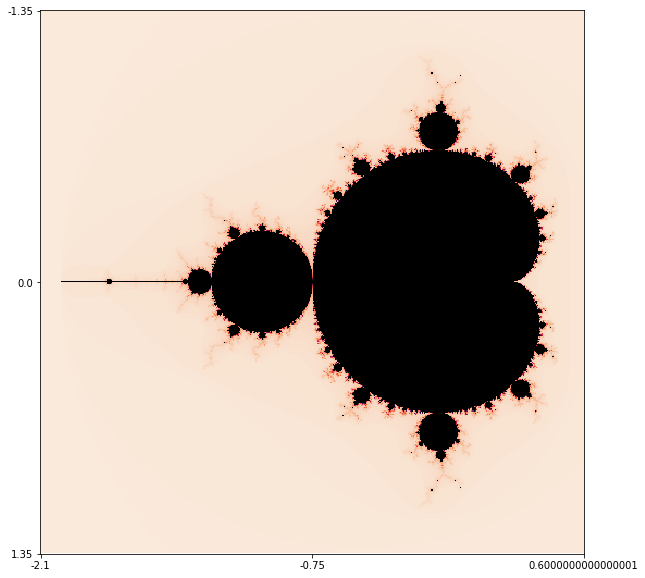

In [7]:
if __name__ == '__main__':
    main(-0.75, 0, zoom=1.35)

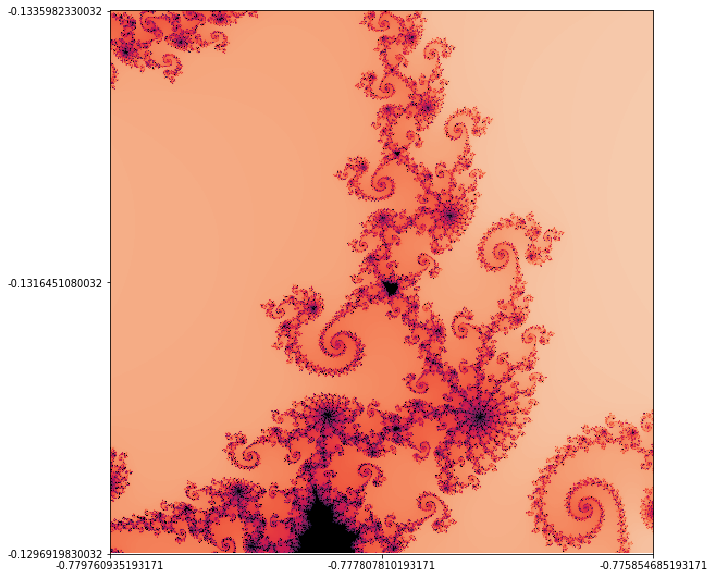

In [8]:
if __name__ == '__main__':
    main(-0.777807810193171, 0.1316451080032, zoom=2 ** -9)